In [3]:
from google.colab import files
uploaded = files.upload()


Saving Customers.csv to Customers.csv
Saving Products.csv to Products.csv
Saving Transactions.csv to Transactions.csv


Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166   

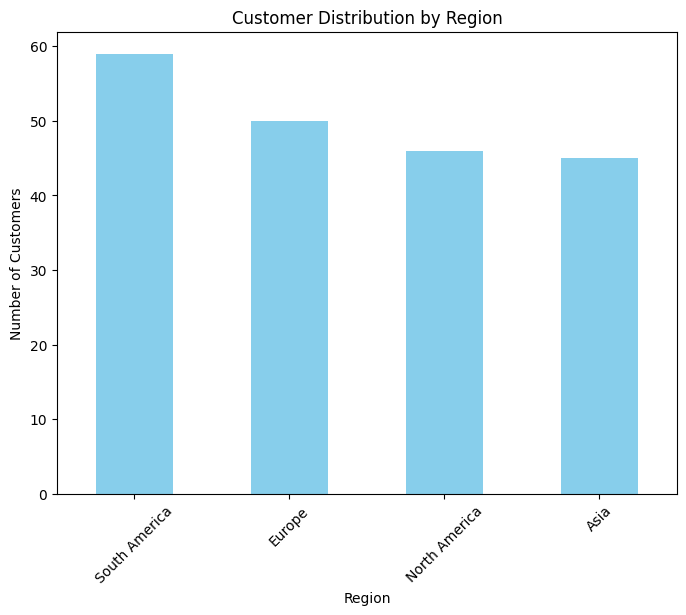

<ipython-input-9-e0c6a20f43a3>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ProductName', y='TotalValue', data=top_products, palette='viridis')


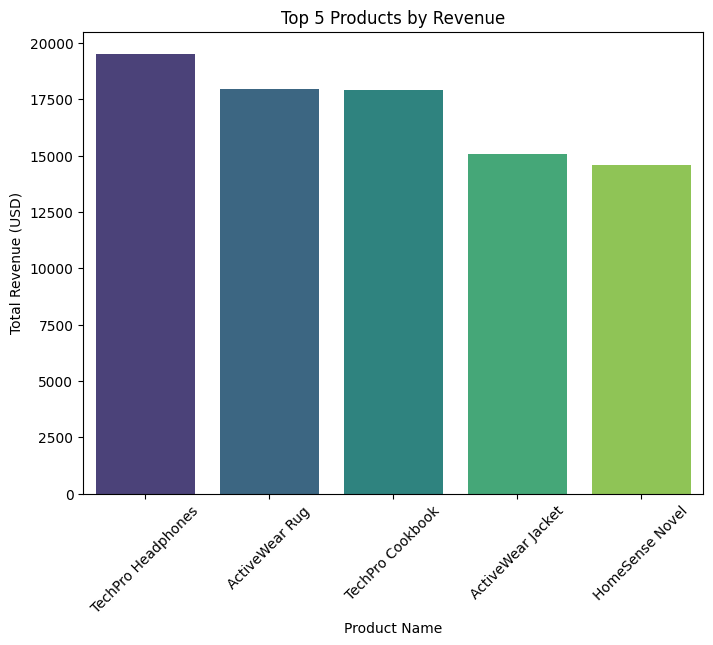

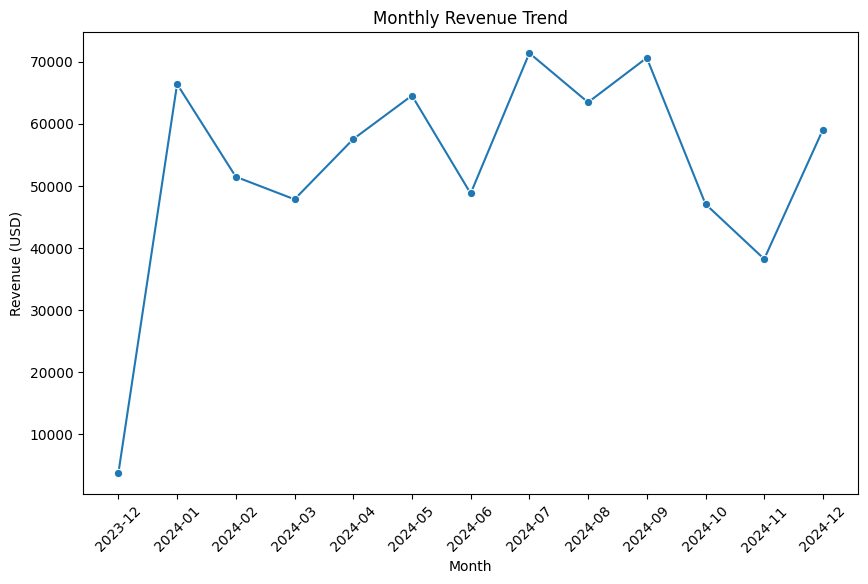

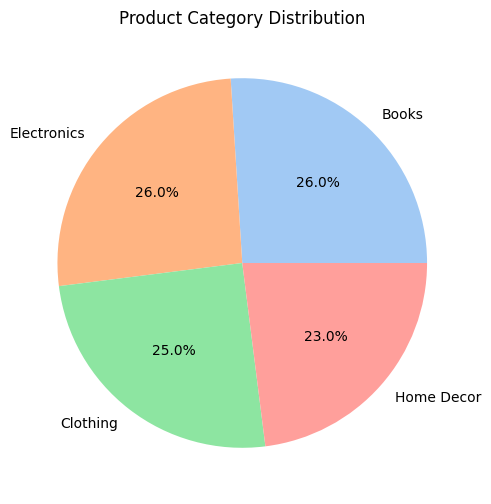

<ipython-input-9-e0c6a20f43a3>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='TotalValue', data=region_avg_transaction, palette='coolwarm')


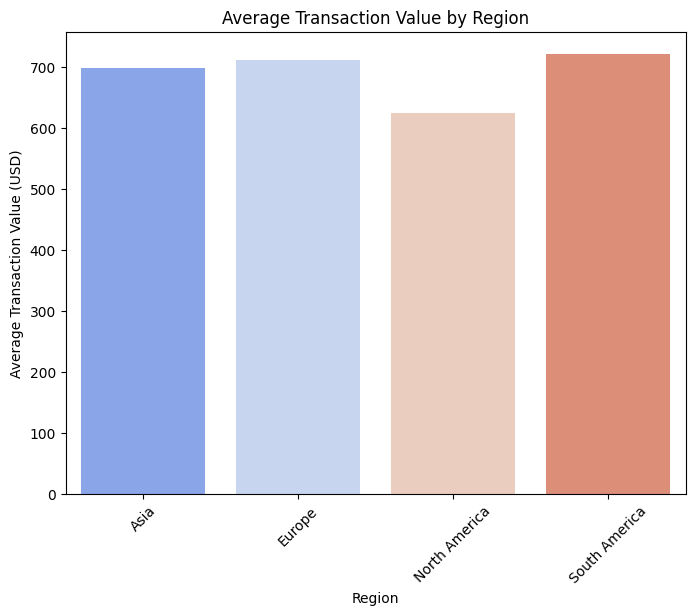

In [9]:



import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os



# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")



# Display first few rows of each dataset
print("Customers Dataset:")
print(customers.head())
print("\nProducts Dataset:")
print(products.head())
print("\nTransactions Dataset:")
print(transactions.head())

# Data Cleaning
# Check for missing values
print("\nMissing Values in Datasets:")
print("Customers:", customers.isnull().sum())
print("Products:", products.isnull().sum())
print("Transactions:", transactions.isnull().sum())

# Handle missing values (if any)
# Example: Filling missing values with placeholders (customize as needed)
customers.fillna("Unknown", inplace=True)
products.fillna("Unknown", inplace=True)
transactions.fillna(0, inplace=True)

# EDA
# 1. Customer distribution by region
customer_region_counts = customers['Region'].value_counts()
plt.figure(figsize=(8, 6))
customer_region_counts.plot(kind='bar', color='skyblue')
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

# 2. Top 5 products by revenue
top_products = transactions.groupby('ProductID').agg({'TotalValue': 'sum'}).reset_index()
top_products = top_products.merge(products, on='ProductID')
top_products = top_products.sort_values(by='TotalValue', ascending=False).head(5)
plt.figure(figsize=(8, 6))
sns.barplot(x='ProductName', y='TotalValue', data=top_products, palette='viridis')
plt.title("Top 5 Products by Revenue")
plt.xlabel("Product Name")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=45)
plt.show()

# 3. Monthly revenue trend
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
# Convert the 'Month' column to string for plotting
monthly_revenue['Month'] = monthly_revenue['Month'].astype(str)

# Plot the monthly revenue trend
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='TotalValue', data=monthly_revenue, marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue (USD)")
plt.xticks(rotation=45)
plt.show()

# 4. Product category distribution
product_category_counts = products['Category'].value_counts()
plt.figure(figsize=(8, 6))
product_category_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Product Category Distribution")
plt.ylabel("")
plt.show()

# 5. Average transaction value by region
transactions = transactions.merge(customers, on='CustomerID')
region_avg_transaction = transactions.groupby('Region').agg({'TotalValue': 'mean'}).reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Region', y='TotalValue', data=region_avg_transaction, palette='coolwarm')
plt.title("Average Transaction Value by Region")
plt.xlabel("Region")
plt.ylabel("Average Transaction Value (USD)")
plt.xticks(rotation=45)
plt.show()

# Business Insights (Generated from EDA):
# 1. Customer distribution by region shows the highest concentration of customers in specific regions.
# 2. Top 5 products contribute significantly to the revenue, suggesting targeted marketing opportunities.
# 3. Monthly revenue trends reveal seasonality in sales, which can guide promotional campaigns.
# 4. Product categories are unevenly distributed, highlighting dominant categories for inventory focus.
# 5. Average transaction value by region indicates differences in purchasing power, useful for regional pricing strategies.

